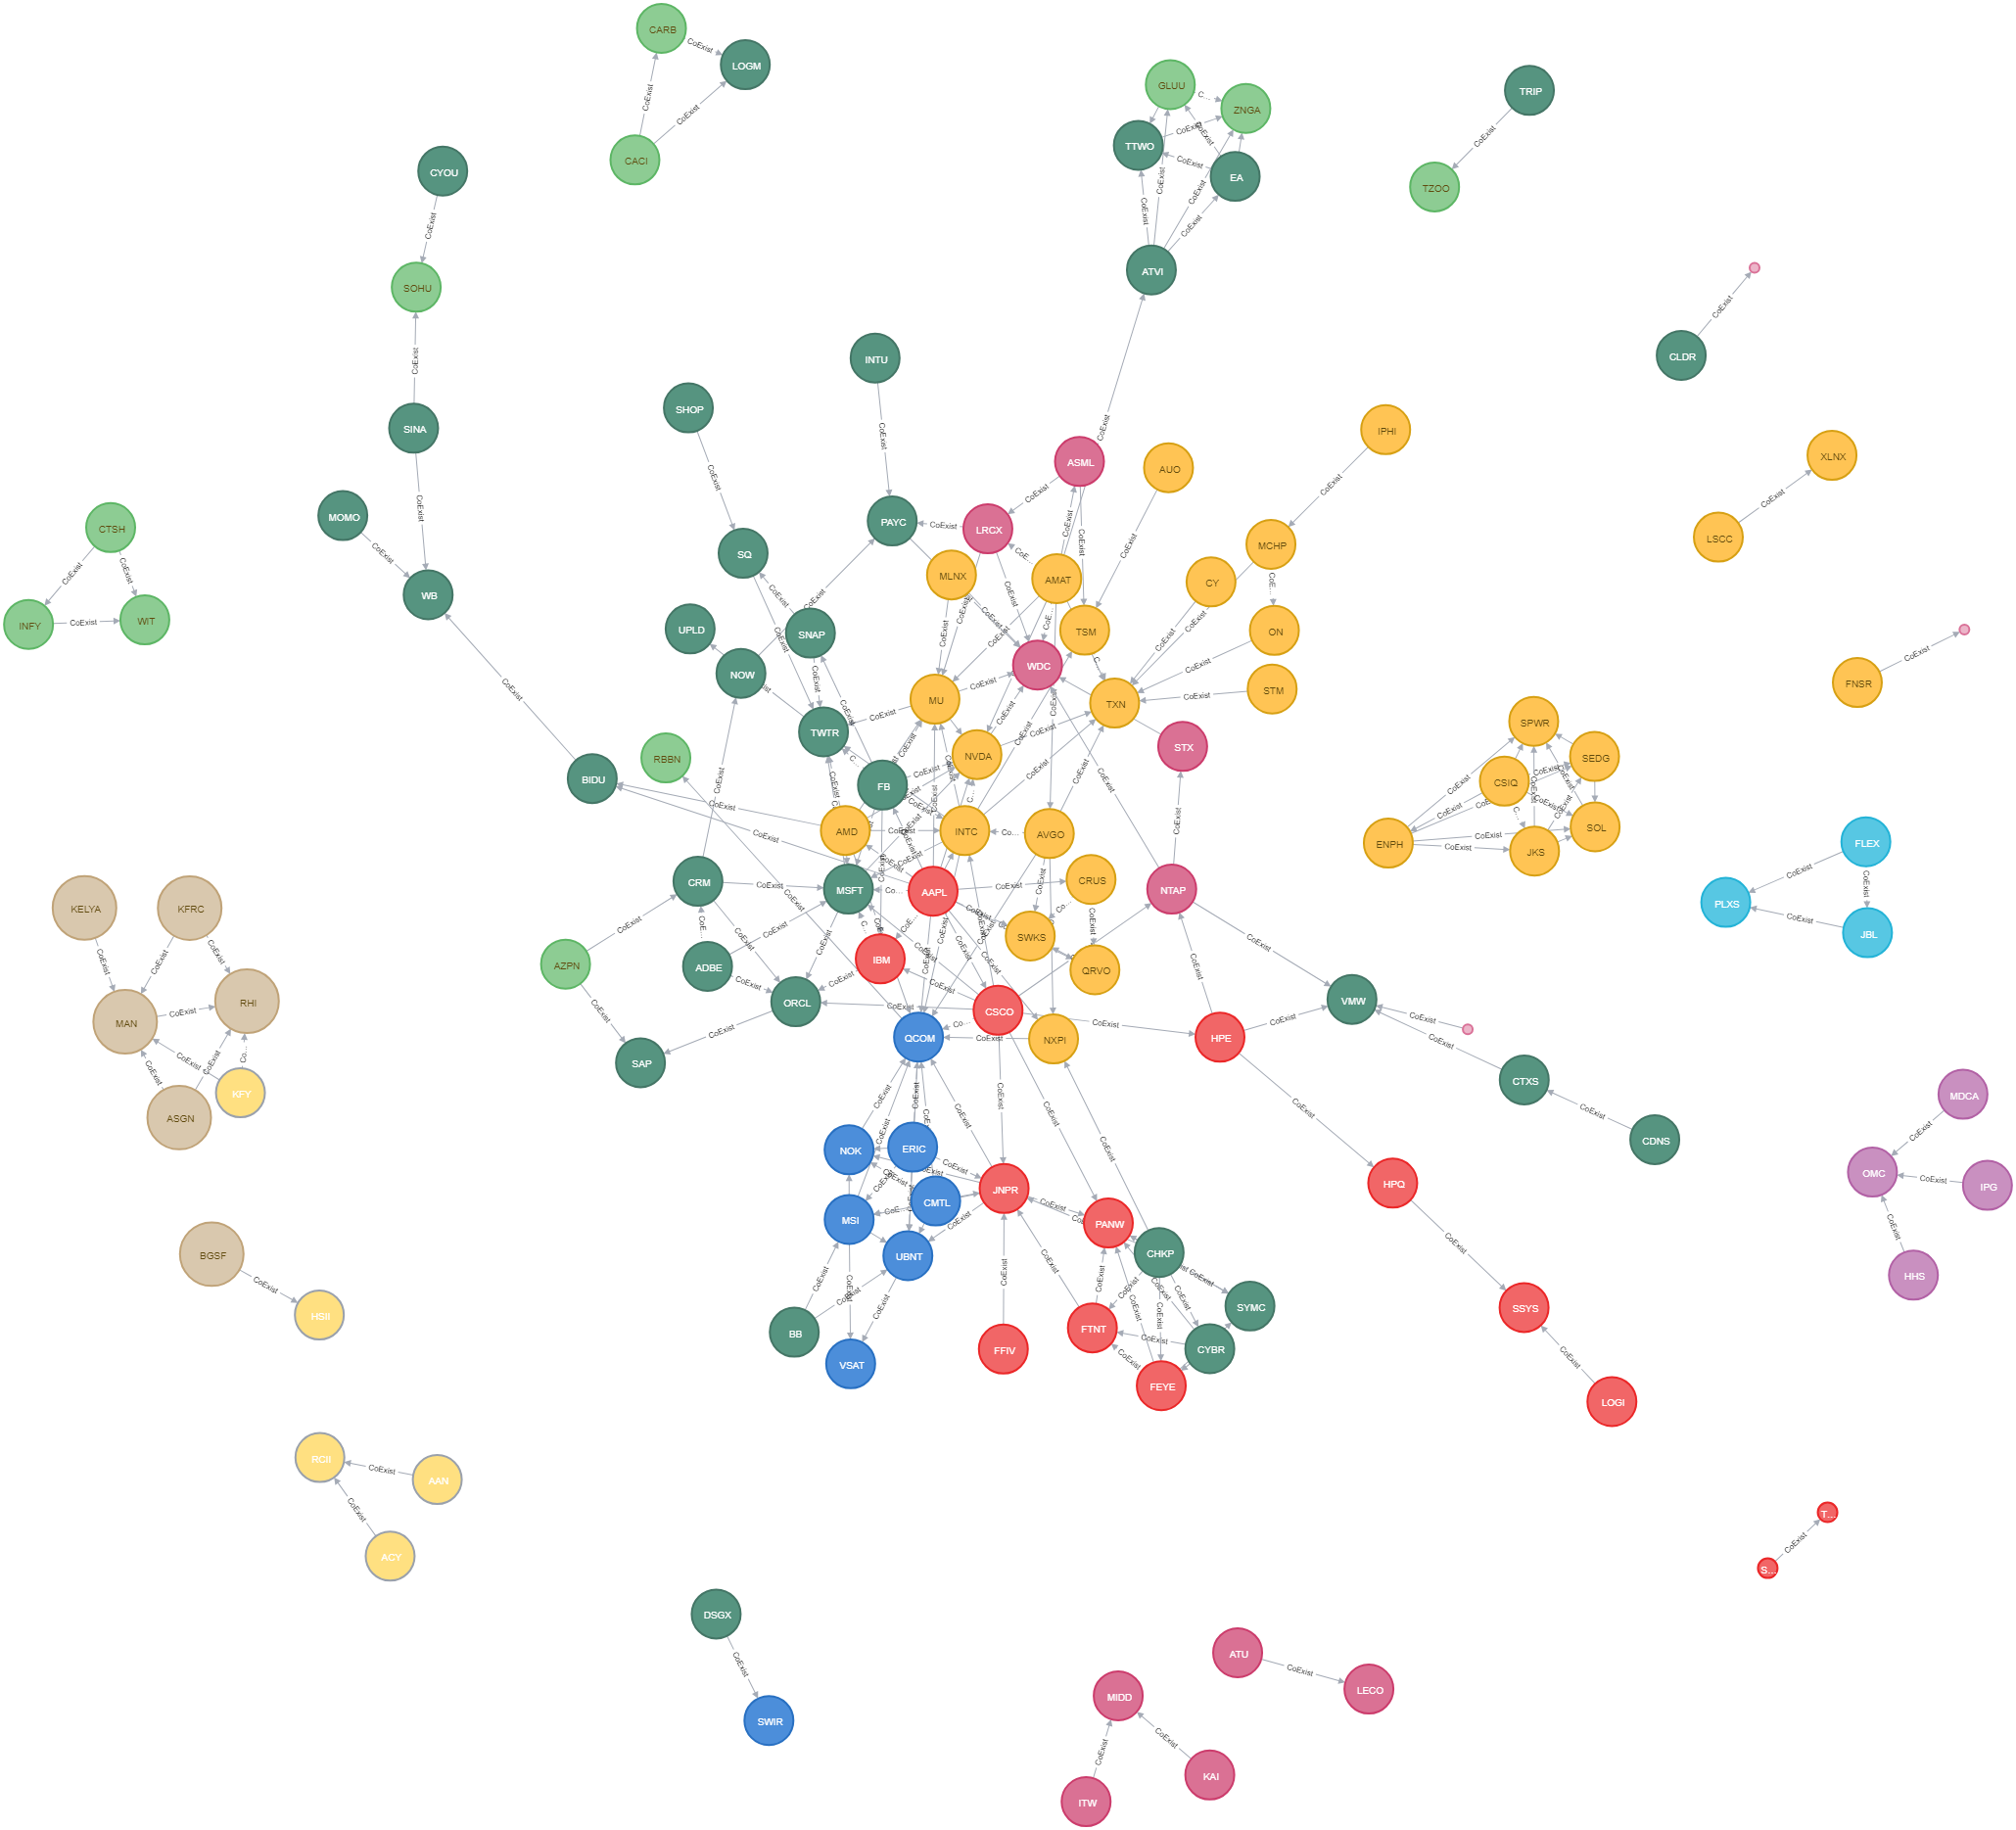

In [3]:
from PIL import Image

allTicker = Image.open(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated\SocialNetWork\all.png')
#allTicker = allTicker.resize((686, 623))
allTicker

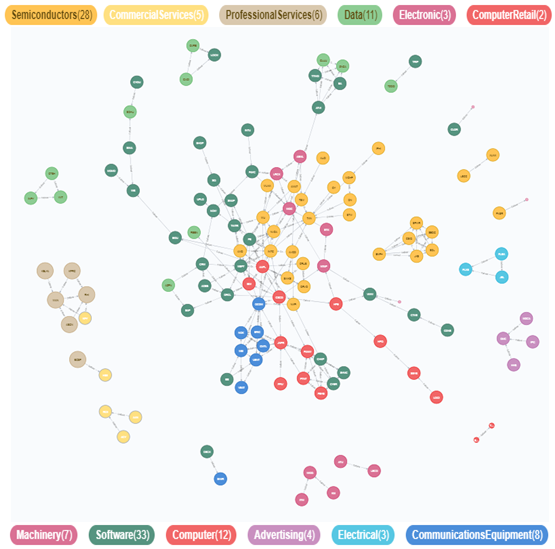

In [5]:
allWithLegend = Image.open('allWithLegend.PNG')
#allTicker = allTicker.resize((686, 623))
allWithLegend

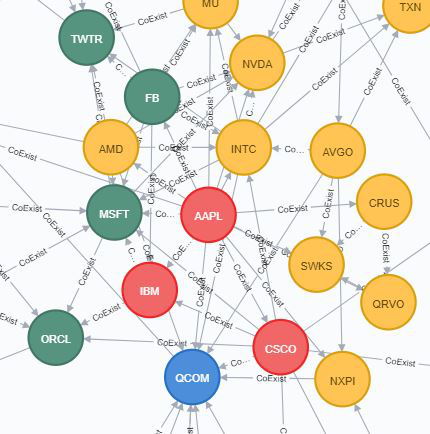

In [4]:
center = Image.open('CenterArea.JPG')
center

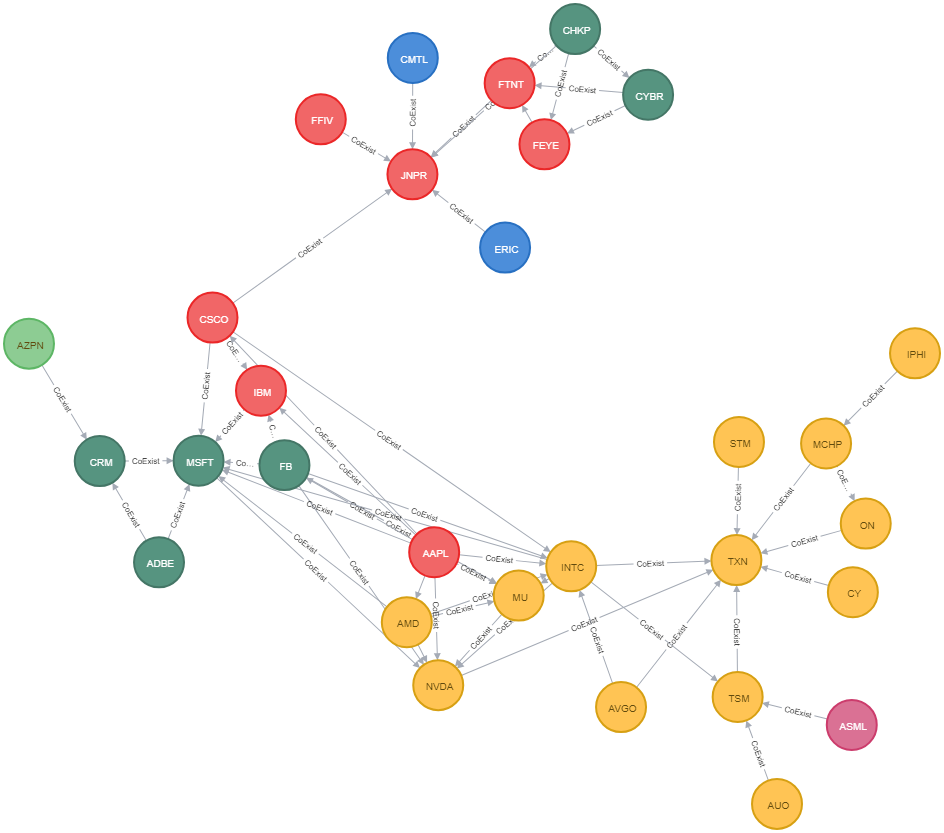

In [2]:
topThreeGroup = Image.open('top 3 community.png')
topThreeGroup

# Read Stock Price Data

In [8]:
import os
os.chdir(r'C:\Users\Derrick\Documents\Scripts\Python\StockRelated\SocialNetWork\StockData')
path = os.getcwd()

In [11]:
import pandas as pd
fileList = os.listdir(path)
fileList = pd.DataFrame(fileList, columns=['csvFile'])

In [14]:
fileList['Symbol'] = fileList['csvFile'].str.replace('.csv', '')

In [15]:
fileList.head()

,csvFile,Symbol
0,AAN.csv,AAN
1,AAPL.csv,AAPL
2,ACY.csv,ACY
3,ADBE.csv,ADBE
4,AMAT.csv,AMAT


In [34]:
for i in range(len(fileList)):
    fileName = fileList['csvFile'][i]
    stock = fileList['Symbol'][i]
    try:
        df = pd.read_csv(fileName)
        df['Date'] = pd.to_datetime(df['Date'])
        df = df[ (df['Date']>'2017-03-05')  &  (df['Date'] < '2019-02-27') ]
        if len(df) < 496:
            print(stock, len(df))
    except:
        print(stock, "not right")
    

CLDR 458
DVMT 458
HDP 462
OCLR not right


In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
4067,2017-03-06,5846.419922,5857.740234,5827.459961,5849.180176,5849.180176,1767840000,^IXIC
4068,2017-03-07,5836.120117,5859.770020,5826.319824,5833.930176,5833.930176,1822000000,^IXIC
4069,2017-03-08,5838.439941,5860.629883,5832.629883,5837.549805,5837.549805,1810480000,^IXIC
4070,2017-03-09,5834.669922,5852.540039,5812.080078,5838.810059,5838.810059,1883930000,^IXIC
4071,2017-03-10,5867.160156,5872.600098,5835.439941,5861.729980,5861.729980,1982150000,^IXIC


In [23]:
df['Date'][1]

Timestamp('2001-01-03 00:00:00')

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df = df[ (df['Date']>'2017-02-20')  &  (df['Date'] < '2019-02-27') ]

In [28]:
len(df)

287

In [36]:
import pyodbc

server='LPC\Dev2016'
db= 'Stock'
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

sqlStr = '''
with CTE as (
SELECT [Date]
,row_number() over (order by Date) as Seq
,ceiling( (row_number() over (order by Date)-1) /7) as Wk
  FROM [Stock].[dbo].[Dim_Date]
  where [Date] between '2017-03-05' and '2019-02-27'
)

,CTE1 as (
select Date, Wk
,row_number() over (partition by Wk order by Seq desc) RevSeq
from CTE
)

select * from CTE1
'''

dates = pd.io.sql.read_sql(sqlStr, conn)
dates['Date'] = pd.to_datetime(dates['Date'])
dates.head(1)

,Date,Wk,RevSeq
0,2017-03-11,0,1


In [45]:
mgd = df.merge(dates, left_on = ['Date'], right_on = ['Date'], how= 'inner')

In [46]:
mgd.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol,Wk,RevSeq
0,2017-03-06,5846.419922,5857.740234,5827.459961,5849.180176,5849.180176,1767840000,^IXIC,0,6
1,2017-03-07,5836.120117,5859.770020,5826.319824,5833.930176,5833.930176,1822000000,^IXIC,0,5
2,2017-03-08,5838.439941,5860.629883,5832.629883,5837.549805,5837.549805,1810480000,^IXIC,0,4
3,2017-03-09,5834.669922,5852.540039,5812.080078,5838.810059,5838.810059,1883930000,^IXIC,0,3
4,2017-03-10,5867.160156,5872.600098,5835.439941,5861.729980,5861.729980,1982150000,^IXIC,0,2


In [49]:
mgd.groupby('Wk').last()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol,RevSeq
Wk,,,,,,,,,
0,2017-03-10,5867.160156,5872.600098,5835.439941,5861.729980,5861.729980,1982150000,^IXIC,2
1,2017-03-17,5898.580078,5912.609863,5890.419922,5901.000000,5901.000000,-1110837296,^IXIC,2
2,2017-03-24,5839.330078,5858.950195,5807.830078,5828.740234,5828.740234,1841920000,^IXIC,2
3,2017-03-31,5905.629883,5927.810059,5901.770020,5911.740234,5911.740234,1902800000,^IXIC,2
4,2017-04-07,5873.939941,5892.069824,5855.509766,5877.810059,5877.810059,1692150000,^IXIC,2
5,2017-04-13,5828.370117,5856.540039,5805.149902,5805.149902,5805.149902,1581870000,^IXIC,3
6,2017-04-21,5919.020020,5919.229980,5899.430176,5910.520020,5910.520020,1723210000,^IXIC,2
7,2017-04-28,6072.870117,6074.040039,6040.709961,6047.609863,6047.609863,1995160000,^IXIC,2
8,2017-05-05,6091.689941,6100.759766,6067.160156,6100.759766,6100.759766,1899570000,^IXIC,2
